In [1]:
# Optimization. Hyper-Parameter Optimization

In [2]:
# %qtconsole

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from yellowbrick.model_selection import ValidationCurve
from joblib import load
import numpy as np
#
from moduleOptimization import OptimizationMethods

In [4]:
# class instance
opt = OptimizationMethods()

C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


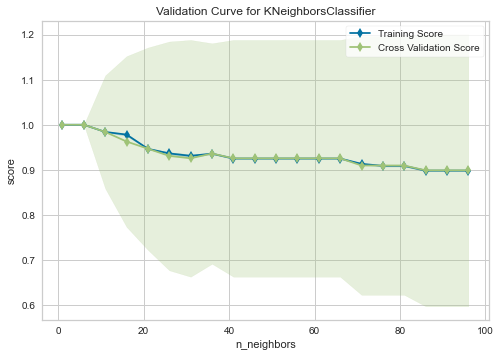

C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


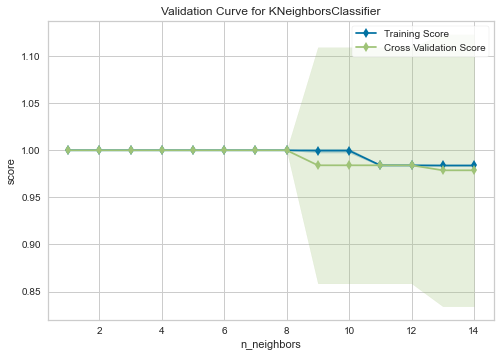

In [7]:
# https://numpy.org/doc/stable/reference/generated/numpy.var.html
# https://www.scikit-yb.org/en/latest/api/model_selection/cross_validation.html?highlight=scoring#classification

# cv = StratifiedKFold(10)
cv = LeaveOneOut()

dataset_to_process = 'smote_pca' # '','smote','smote_pca'
features_to_process = 'auto' # 'manual','auto'

x_part, y_part = None, None
with open('fragments/'+dataset_to_process+'_x_'+features_to_process+'.joblib', 'rb') as f: x_part = load(f)
with open('fragments/'+dataset_to_process+'_y_'+features_to_process+'.joblib', 'rb') as f: y_part = load(f)

viz2 = ValidationCurve(KNeighborsClassifier(), param_name="n_neighbors", 
                      param_range=np.arange(1, 100, 5),
                      cv=cv, scoring="f1_weighted", n_jobs=4)
viz2.fit(x_part, y_part)
viz2.show()
# 
viz4 = ValidationCurve(KNeighborsClassifier(), param_name="n_neighbors", 
                      param_range=np.arange(1, 15, 1),
                      cv=cv, scoring="f1_weighted", n_jobs=4)
viz4.fit(x_part, y_part)
viz4.show()

In [9]:
# Improve Testing accuracy over the PCA Dataset
dataset_to_process = 'smote_pca' # '','smote','smote_pca'
features_to_process = 'auto' # 'manual','auto'

x_part, y_part = None, None
with open('fragments/'+dataset_to_process+'_x_'+features_to_process+'.joblib', 'rb') as f: x_part = load(f)
with open('fragments/'+dataset_to_process+'_y_'+features_to_process+'.joblib', 'rb') as f: y_part = load(f)

opt.hpo(x_part, y_part)

Best CV Score for Logistic Regression: 1.00 Parameters: {'penalty': 'l1', 'solver': 'liblinear'}.
Best CV Score for Decision Tree: 0.99 Parameters: {'criterion': 'entropy', 'max_depth': 5}.
Best CV Score for Random Forest: 0.99 Parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 10}.
Best CV Score for Support Vector Classifier: 1.00 Parameters: {'C': 0.5, 'degree': 1, 'kernel': 'linear'}.
Best CV Score for Gaussian Naive Bayes: 0.97 Parameters: {'var_smoothing': 0.0}.
Best CV Score for Multi-layer Perceptron: 1.00 Parameters: {'activation': 'identity', 'solver': 'lbfgs'}.
Best CV Score for K Neighbors Classifier: 1.00 Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}.
